# Statistiques descriptives

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("2025_Lol_esports_match_data_from_OraclesElixir.csv") 
df.head(10)

C:\Users\jerem\AppData\Local\Temp\ipykernel_10920\3878814471.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2025_Lol_esports_match_data_from_OraclesElixir.csv")


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,200.0,224.0,-1.0,17.0,1.0,1.0,2.0,2.0,4.0,2.0
1,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,157.0,-2363.0,-1444.0,-18.0,0.0,1.0,2.0,1.0,7.0,0.0
2,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,241.0,-1552.0,-2465.0,-41.0,1.0,0.0,2.0,1.0,5.0,1.0
3,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,257.0,-2613.0,-1156.0,-6.0,1.0,1.0,2.0,6.0,2.0,0.0
4,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,20.0,-662.0,-734.0,18.0,0.0,2.0,2.0,0.0,8.0,0.0
5,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,217.0,-224.0,1.0,-17.0,2.0,4.0,2.0,1.0,1.0,2.0
6,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,139.0,2363.0,1444.0,18.0,1.0,7.0,0.0,0.0,1.0,2.0
7,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,200.0,1552.0,2465.0,41.0,1.0,5.0,1.0,1.0,0.0,2.0
8,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,251.0,2613.0,1156.0,6.0,6.0,2.0,0.0,1.0,1.0,2.0
9,LOLTMNT03_179647,complete,NaN,LFL2,2025,Winter,0,2025-01-11 11:11:24,1,15.01,...,38.0,662.0,734.0,-18.0,0.0,8.0,0.0,0.0,2.0,2.0


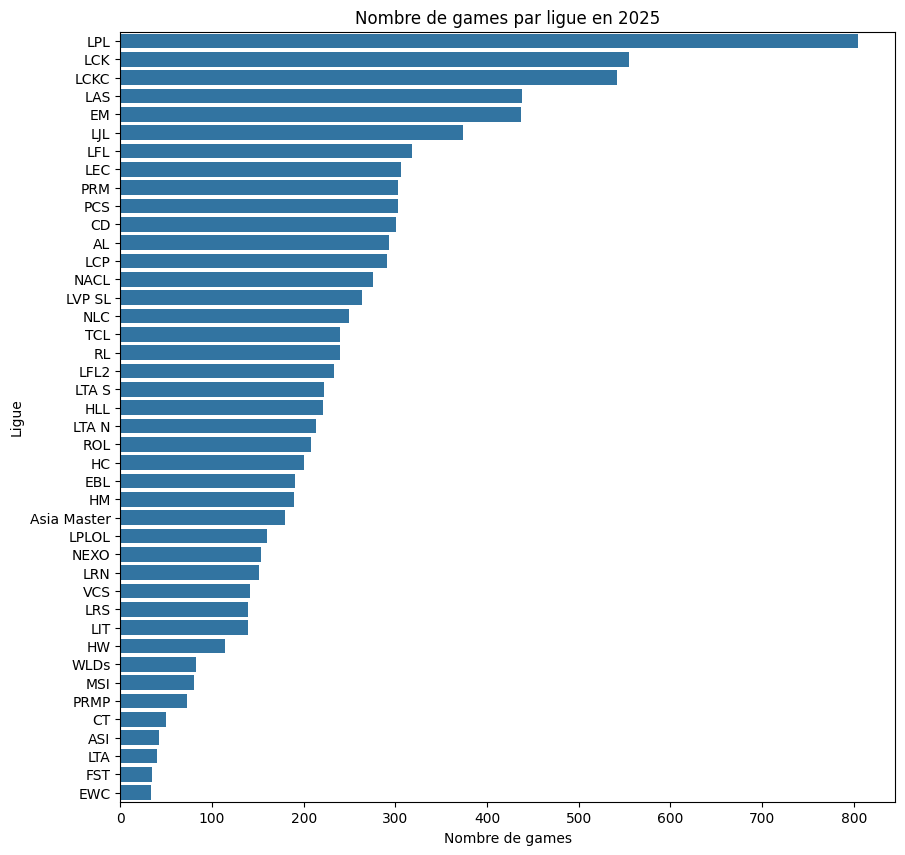

In [75]:
#Histogramme nombre de game par ligue

df_team= df[df['position']=='team']

leagues_counts = df_team['league'].value_counts() / 2
plt.figure(figsize=(10,10))
sns.barplot(y=leagues_counts.index, x=leagues_counts.values)
plt.title('Nombre de games par ligue en 2025')
plt.ylabel('Ligue')
plt.xlabel('Nombre de games')
plt.show()


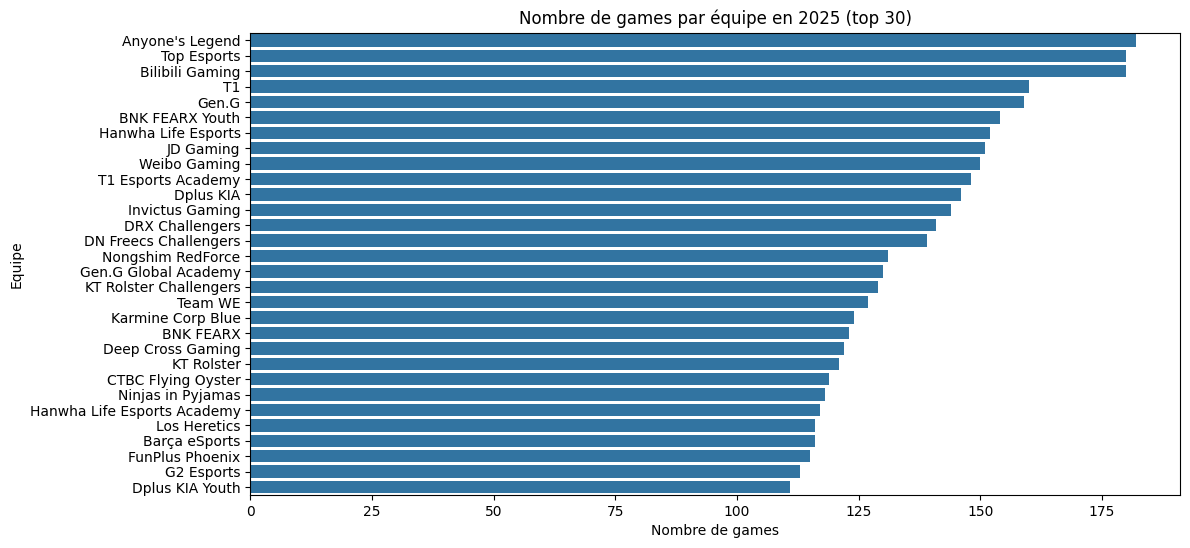

In [76]:
#Histogramme nombre de game par équipe

leagues_counts = df_team['teamname'].value_counts()
leagues_counts_top30 = leagues_counts.head(30)
plt.figure(figsize=(12,6))
sns.barplot(y=leagues_counts_top30.index, x=leagues_counts_top30.values)
plt.title('Nombre de games par équipe en 2025 (top 30)')
plt.ylabel('Equipe')
plt.xlabel('Nombre de games')
plt.show()

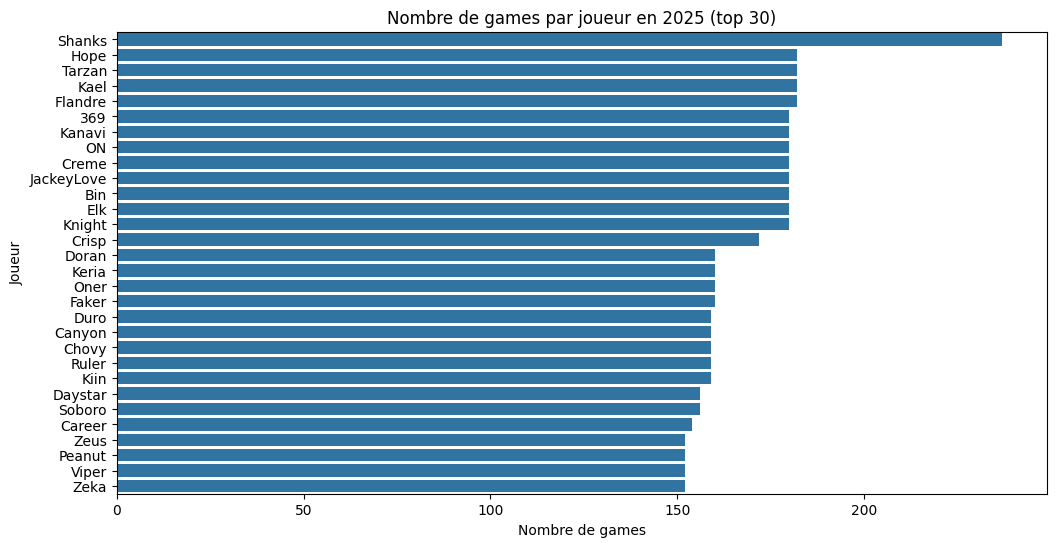

In [77]:
#histogramme nombre de game par joueur
player_counts = df['playername'].value_counts()
player_counts_top30 = player_counts.head(30)
plt.figure(figsize=(12,6))
sns.barplot(y=player_counts_top30.index, x=player_counts_top30.values)
plt.title('Nombre de games par joueur en 2025 (top 30)')
plt.ylabel('Joueur')
plt.xlabel('Nombre de games')
plt.show()

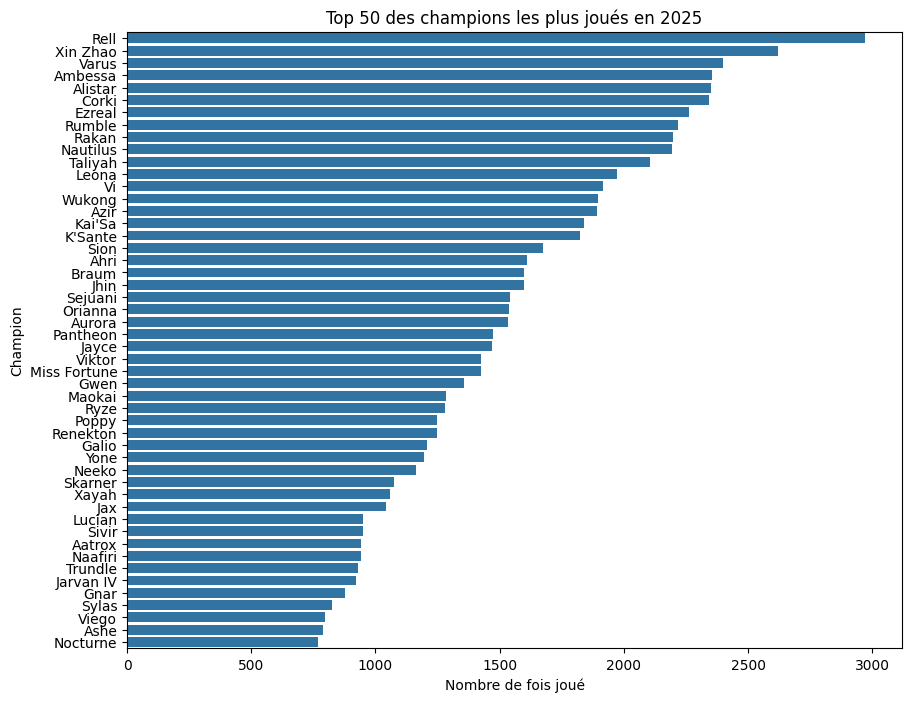

In [78]:
#histogramme champions les plus joués

champ_counts = df['champion'].value_counts()
top50_champs = champ_counts.head(50)
plt.figure(figsize=(10,8))
sns.barplot(y=top50_champs.index, x=top50_champs.values)
plt.title('Top 50 des champions les plus joués en 2025')
plt.ylabel('Champion')
plt.xlabel('Nombre de fois joué')
plt.show()


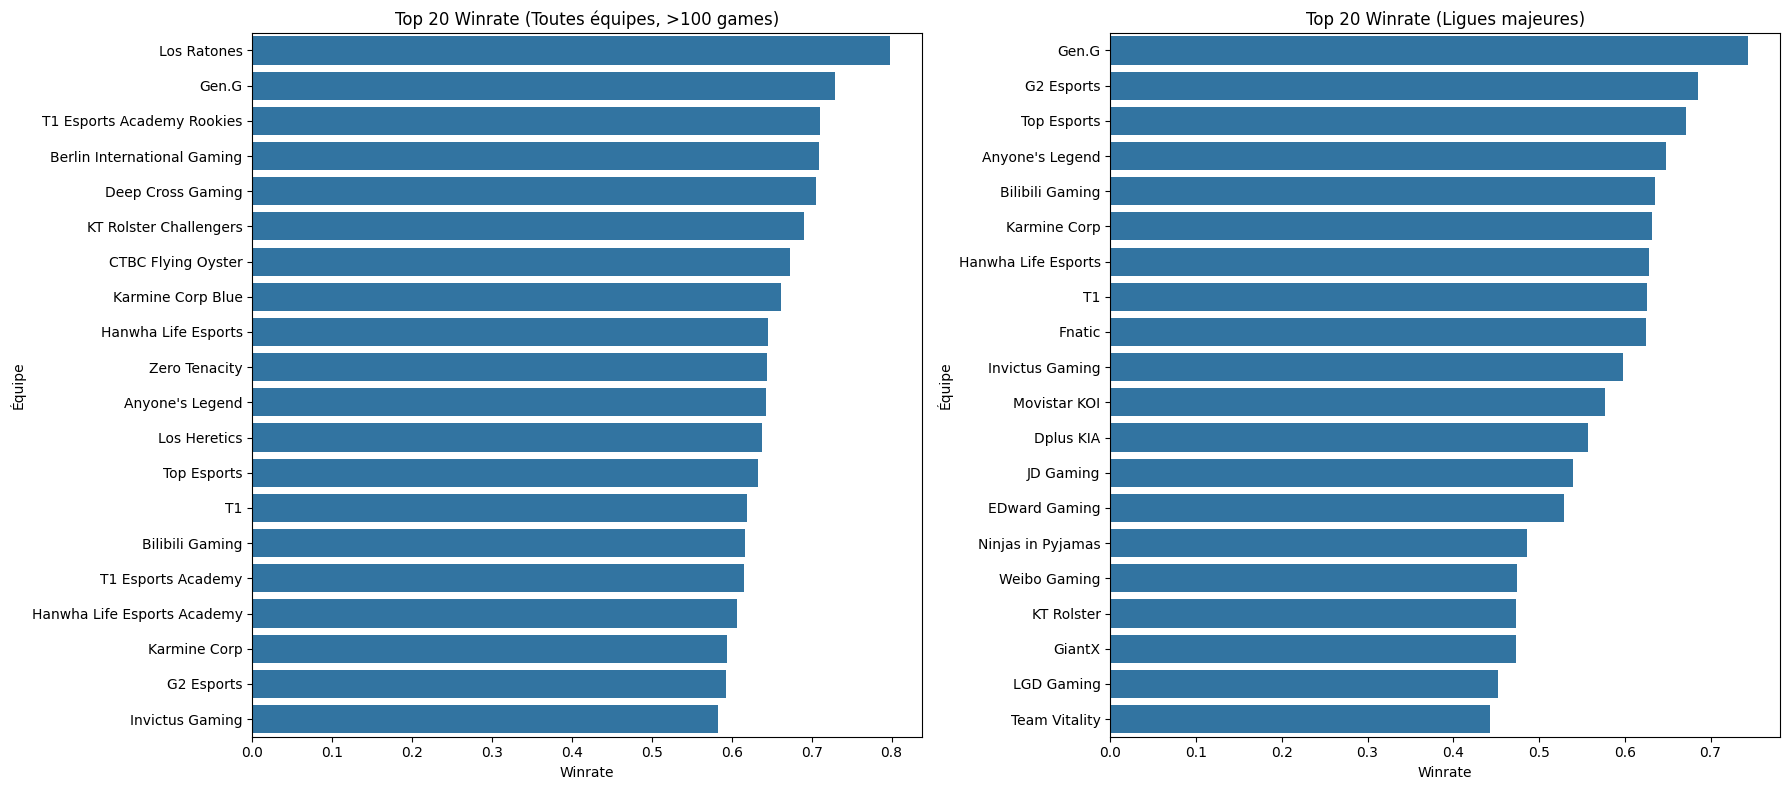

In [79]:
# Equipes avec le meilleur winrate
team_stats = df_team.groupby('teamname').agg({'result': ['sum', 'count']})
team_stats.columns = ['wins', 'total_games']
team_stats['winrate'] = team_stats['wins'] / team_stats['total_games']

team_stats_filtered = team_stats[team_stats['total_games'] > 100]

i = 20
top_teams = team_stats_filtered.sort_values(by='winrate', ascending=False).head(i)

major_leagues = ["LCK", "LPL", "LEC", "LCS"]

df_major = df_team[df_team['league'].isin(major_leagues)]

major_stats = df_major.groupby('teamname').agg({'result': ['sum', 'count']})
major_stats.columns = ['wins', 'total_games']
major_stats['winrate'] = major_stats['wins'] / major_stats['total_games']

top_major = major_stats.sort_values(by='winrate', ascending=False).head(i)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(
    ax=axes[0],
    y=top_teams.index,
    x=top_teams['winrate'],
)
axes[0].set_title(f"Top {i} Winrate (Toutes équipes, >100 games)")
axes[0].set_xlabel("Winrate")
axes[0].set_ylabel("Équipe")

sns.barplot(
    ax=axes[1],
    y=top_major.index,
    x=top_major['winrate'],
)
axes[1].set_title(f"Top {i} Winrate (Ligues majeures)")
axes[1].set_xlabel("Winrate")
axes[1].set_ylabel("Équipe")

plt.tight_layout()
plt.show()